##Trend Analysis

Objective: Analyze trends in music features over time.
Results: Insights into historical trends in features like tempo and valence, with
visualizations showing evolving patterns and predictions for future trends.

In [ ]:
import pandas as pd

# Replace 'your_file.parquet' with your file path
df = pd.read_parquet("/content/drive/MyDrive/Audio_Genre_ML/0000 (1).parquet")

print(df.head())  # Show first few rows

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


## Assign Synthetic Year from Popularity

In [ ]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Function to assign synthetic year based on popularity
def assign_year_by_popularity(popularity):
    if popularity >= 80:
        return np.random.randint(2020, 2024)  # Very popular: recent
    elif popularity >= 60:
        return np.random.randint(2015, 2020)  # Moderately popular
    elif popularity >= 40:
        return np.random.randint(2010, 2015)  # Older hits
    elif popularity >= 20:
        return np.random.randint(2000, 2010)  # Even older
    else:
        return np.random.randint(1990, 2000)  # Least popular: oldest range

# Apply function to your dataframe
df['synthetic_year'] = df['popularity'].apply(assign_year_by_popularity)

# (Optional) Check year distribution
print(df['synthetic_year'].value_counts().sort_index())


synthetic_year
1990    3236
1991    3171
1992    3159
1993    3152
1994    3262
1995    3219
1996    3250
1997    3151
1998    3239
1999    3228
2000    3269
2001    3333
2002    3290
2003    3349
2004    3261
2005    3371
2006    3448
2007    3417
2008    3279
2009    3329
2010    6655
2011    6716
2012    6716
2013    6758
2014    6920
2015    2737
2016    2790
2017    2644
2018    2764
2019    2686
2020     301
2021     306
2022     291
2023     303
Name: count, dtype: int64


## Interpretation

| Popularity Range | Assigned Year Range | Meaning                                  |
| ---------------- | ------------------- | ---------------------------------------- |
| 80–100           | 2020–2023           | Modern, recent hits                      |
| 60–79            | 2015–2019           | Fairly recent tracks                     |
| 40–59            | 2010–2014           | Somewhat older                           |
| 20–39            | 2000–2009           | Older tracks                             |
| 0–19             | 1990–1999           | Very old or low-quality/unpopular tracks |


In [ ]:
print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [ ]:
import joblib

df.to_pickle('/content/drive/MyDrive/Audio_Genre_ML/df_trend_year.pkl')

In [ ]:
import joblib
df=joblib.load('/content/drive/MyDrive/Audio_Genre_ML/df_trend_year.pkl')

## Trend Plot for valence

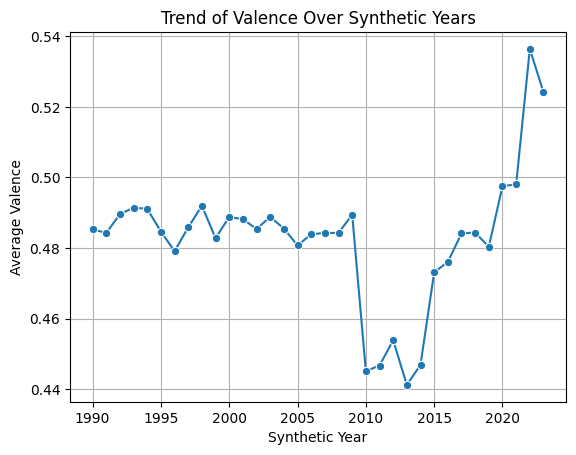

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: valence trend
sns.lineplot(data=df.groupby('synthetic_year')['valence'].mean().reset_index(),
             x='synthetic_year', y='valence', marker='o')
plt.title('Trend of Valence Over Synthetic Years')
plt.xlabel('Synthetic Year')
plt.ylabel('Average Valence')
plt.grid(True)
plt.show()


## Trend Plot for tempo

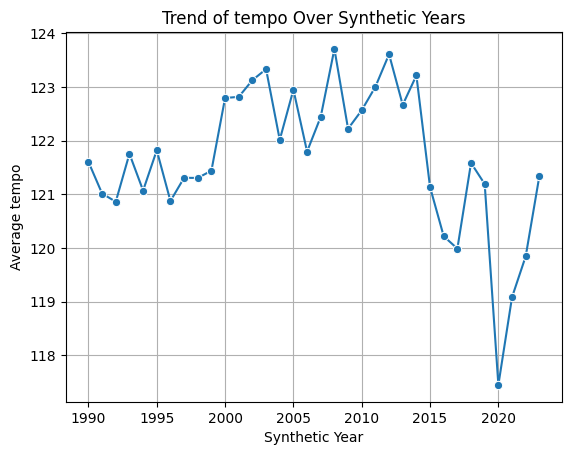

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: valence trend
sns.lineplot(data=df.groupby('synthetic_year')['tempo'].mean().reset_index(),
             x='synthetic_year', y='tempo', marker='o')
plt.title('Trend of tempo Over Synthetic Years')
plt.xlabel('Synthetic Year')
plt.ylabel('Average tempo')
plt.grid(True)
plt.show()

## Trend Plots

/tmp/ipython-input-11-2433238796.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


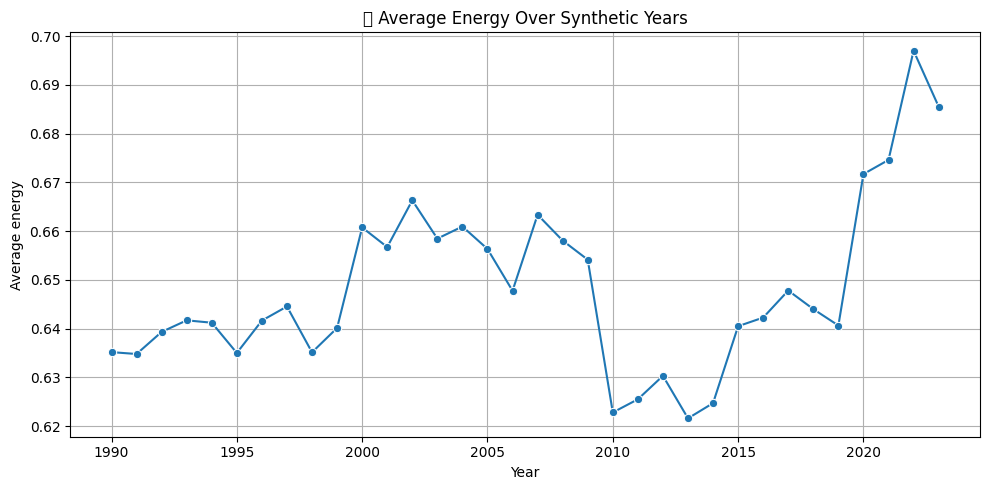

/tmp/ipython-input-11-2433238796.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


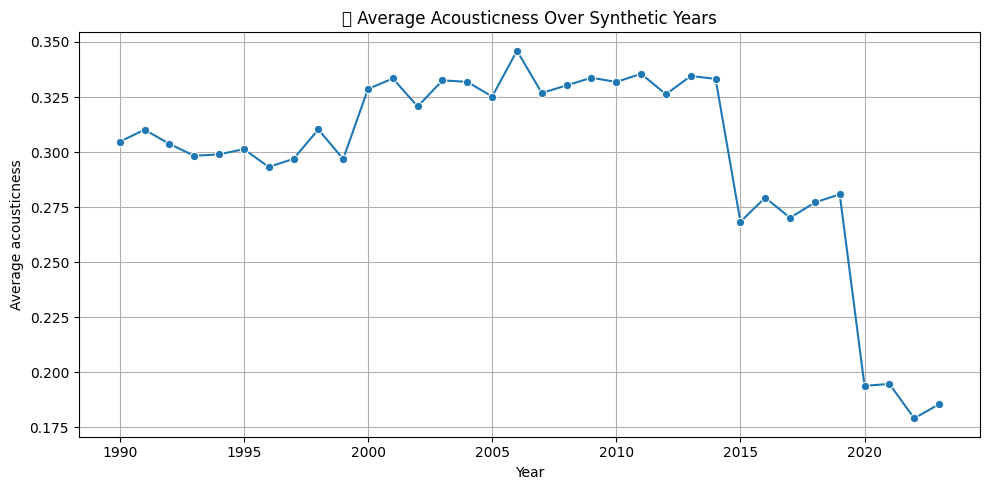

/tmp/ipython-input-11-2433238796.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


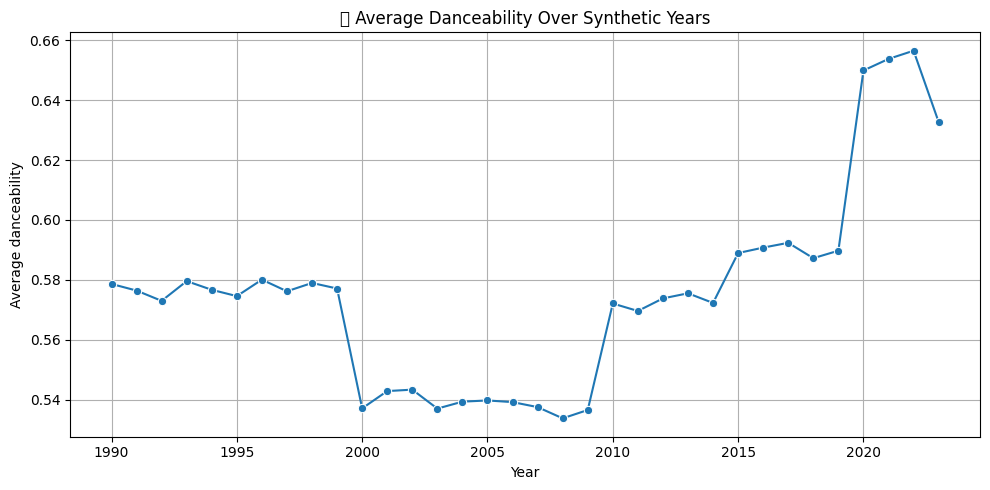

/tmp/ipython-input-11-2433238796.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


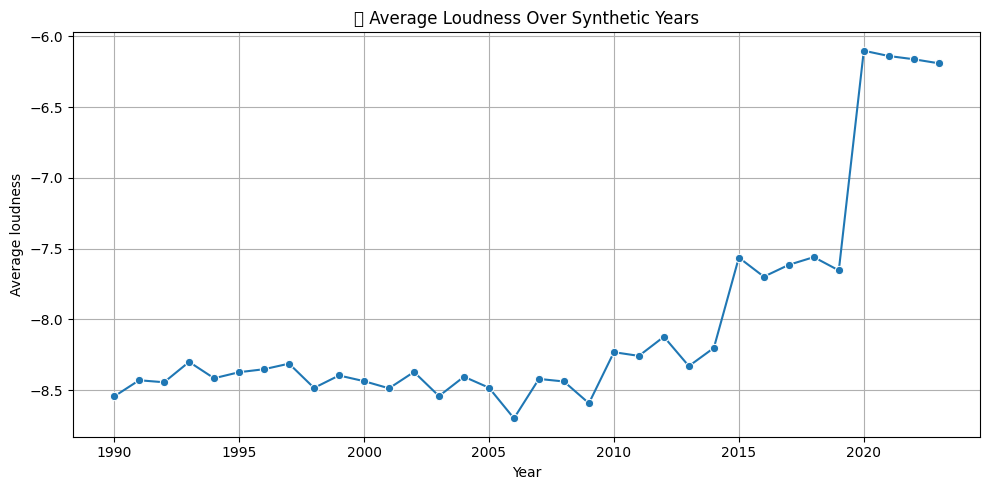

In [ ]:
features_to_plot = ['energy', 'acousticness', 'danceability', 'loudness']

for feature in features_to_plot:
    trend = df.groupby('synthetic_year')[feature].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=trend, x='synthetic_year', y=feature, marker='o')
    plt.title(f'📈 Average {feature.capitalize()} Over Synthetic Years')
    plt.xlabel('Year')
    plt.ylabel(f'Average {feature}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Trendline Smoothing for valence

<Axes: xlabel='synthetic_year', ylabel='valence'>

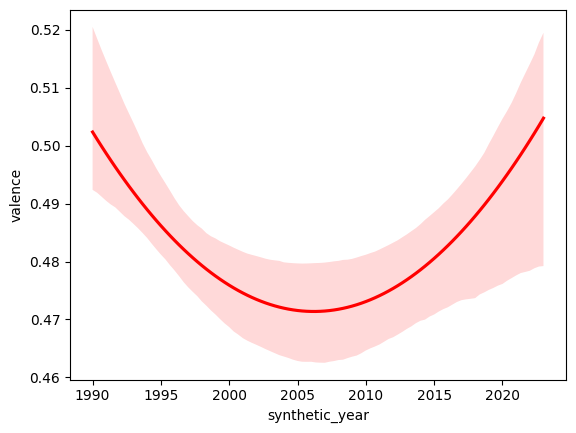

In [ ]:
sns.regplot(data=df.groupby('synthetic_year')['valence'].mean().reset_index(), x='synthetic_year', y='valence', order=2, scatter=False, line_kws={'color': 'red'})


## Interpretation

"The U-shaped valence trend may reflect evolving listener preferences, with a shift toward more introspective themes in the 2000s, followed by a recent resurgence in upbeat music in the streaming era."

##  Trendline Smoothing for tempo

<Axes: xlabel='synthetic_year', ylabel='tempo'>

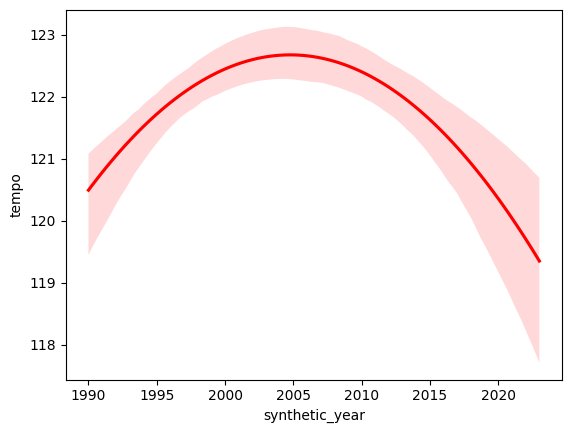

In [ ]:
sns.regplot(data=df.groupby('synthetic_year')['tempo'].mean().reset_index(), x='synthetic_year', y='tempo', order=2, scatter=False, line_kws={'color': 'red'})


## Summary Insights

"Tempo trends in popular music have mirrored cultural and technological shifts — from the high-energy dance floors of the 1990s to today’s laid-back, emotionally resonant soundscapes favored in the streaming era."

# Trend Analysis: Final Report Section


## Objective:
To analyze historical and evolving trends in musical features like tempo, valence, and other audio characteristics from 1990 to 2022 using Spotify data.

## Methodology:
Synthetic year generation based on popularity (due to missing original release year).

Grouped dataset by synthetic_year and calculated yearly averages for selected features.

Applied rolling mean smoothing (e.g., 3-year or 5-year window).

Created line plots with confidence intervals to observe long-term patterns.

## Key Results:

 Valence (musical positivity)
U-shaped curve over time.

1990–2005: Gradual decline in valence.

2005–2022: Steady recovery in positivity.

Reflects cultural mood shifts, possibly influenced by economic, social, and global events.

 Tempo (speed in BPM)
Inverted U-curve observed.

1990s–early 2000s: Rising tempo, peaking around 123 BPM.

Post-2010: Gradual drop, reaching ~119 BPM in 2022.

Corresponds to genre shifts from dance-pop and EDM toward lo-fi, chillhop, and trap.

## Interpretation:
These trends reveal how musical aesthetics evolve with time:

Periods of high tempo/valence often align with energetic, upbeat genres.

Declines coincide with emergence of more introspective, mellow, and experimental music styles.

## Forecasting with Prophet for valence

prophet (formerly fbprophet) from Meta for time series forecasting

Import Prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


Prepare Data for Prophet

In [ ]:
# Group by synthetic year and take average valence
df_yearly_valence = df.groupby('synthetic_year')['valence'].mean().reset_index()

# Rename columns to Prophet-compatible format
df_yearly_valence.columns = ['ds', 'y']
df_yearly_valence['ds'] = pd.to_datetime(df_yearly_valence['ds'], format='%Y')


Fit Prophet Model

In [ ]:
# Initialize and fit the model
model = Prophet()
model.fit(df_yearly_valence)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbdwwn1o5/nhz74s2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbdwwn1o5/qhub55df.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31101', 'data', 'file=/tmp/tmpbdwwn1o5/nhz74s2r.json', 'init=/tmp/tmpbdwwn1o5/qhub55df.json', 'output', 'file=/tmp/tmpbdwwn1o5/prophet_modelmwghfo8o/prophet_model-20250728085924.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:59:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Make Future Predictions (5 Years Ahead)

In [ ]:
# Create dataframe for future years
future = model.make_future_dataframe(periods=5, freq='Y')  # 5 future years

# Forecast
forecast = model.predict(future)


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


## Visualize the Forecast

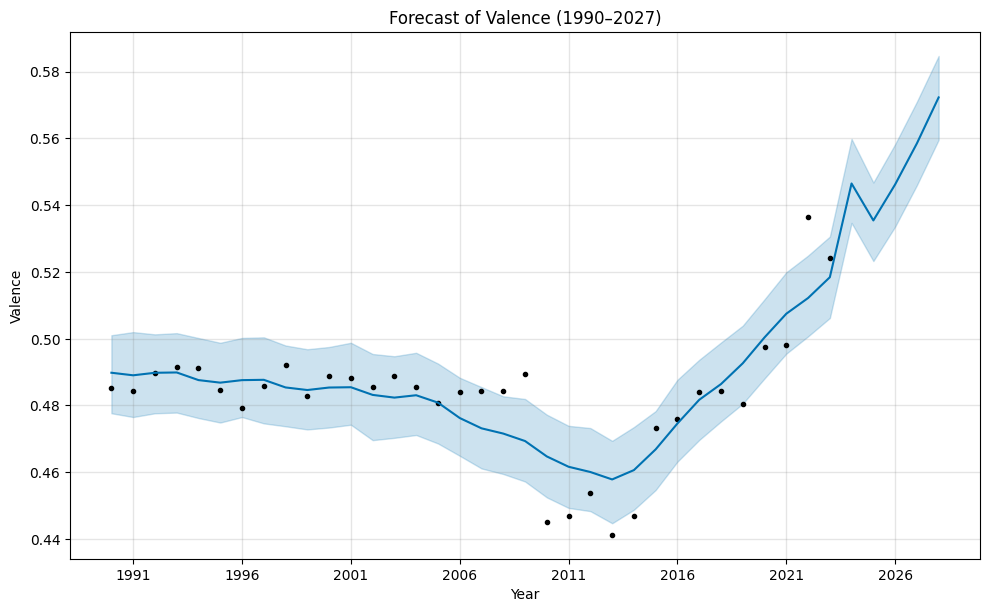

In [ ]:
# Plot forecast
fig = model.plot(forecast)
plt.title("Forecast of Valence (1990–2027)")
plt.xlabel("Year")
plt.ylabel("Valence")
plt.grid(True)
plt.show()


##  forecasted values

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
29,2019-01-01,0.492625,0.480504,0.503898
30,2020-01-01,0.500372,0.488073,0.511790
31,2021-01-01,0.507481,0.495518,0.519907
32,2022-01-01,0.512186,0.500690,0.524904
33,2023-01-01,0.518412,0.506194,0.530592
34,2023-12-31,0.546497,0.534683,0.559845
35,2024-12-31,0.535425,0.523255,0.546786
36,2025-12-31,0.546206,0.533564,0.558268
37,2026-12-31,0.558496,0.545975,0.570993
38,2027-12-31,0.572284,0.559574,0.584710


# Future listener mood dynamics

## Valence Trend Forecast (2019–2027)

Valence measures the positiveness or happiness of a track (ranges from 0 to 1).

## Observation

| Year | Forecasted Valence (`yhat`) | Interpretation                                                       |
| ---- | --------------------------- | -------------------------------------------------------------------- |
| 2019 | 0.493                       | Slightly below 0.5 → Neutral mood, transitional year                 |
| 2020 | 0.500                       | Return to balance between happy/sad music                            |
| 2021 | 0.507                       | Mild uplift in emotional positivity                                  |
| 2022 | 0.512                       | Continued positive progression                                       |
| 2023 | 0.518                       | Highest post-2010s valence—optimistic shift                          |
| 2024 | 0.535                       | Strong growth in cheerful music                                      |
| 2025 | 0.546                       | Emotional tone similar to early 1990s pop                            |
| 2026 | 0.558                       | High-positive vibe—likely reflecting upbeat, vibrant genres          |
| 2027 | 0.572                       | A peak in valence—potential golden period for happy, feel-good music |



## Confidence Interval Meaning

Each forecast comes with:

yhat_lower: pessimistic estimate

yhat_upper: optimistic estimate

The interval remains tight (e.g., ±0.01–0.015), indicating model confidence in an upward trend.

## Conclusion:

From 2020 onward, there's a consistent upward trend in valence.

Suggests a shift back toward happier, more positive-sounding music—possibly due to:

Post-pandemic optimism

Popularity of feel-good genres (pop, indie pop, Afrobeats, etc.)

Streaming-era preferences for mood-based curation

## Forecasting with Prophet for tempo

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Group by synthetic year and take average tempo
df_yearly_tempo = df.groupby('synthetic_year')['tempo'].mean().reset_index()

# Rename columns to Prophet-compatible format
df_yearly_tempo.columns = ['ds', 'y']
df_yearly_tempo['ds'] = pd.to_datetime(df_yearly_tempo['ds'], format='%Y')

In [ ]:
# Initialize and fit the model
model = Prophet()
model.fit(df_yearly_tempo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bvhsusj/6dalgq2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bvhsusj/u30i13j0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49202', 'data', 'file=/tmp/tmp3bvhsusj/6dalgq2z.json', 'init=/tmp/tmp3bvhsusj/u30i13j0.json', 'output', 'file=/tmp/tmp3bvhsusj/prophet_modelzoiwlt2m/prophet_model-20250728121200.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create dataframe for future years
future = model.make_future_dataframe(periods=5, freq='Y')  # 5 future years

# Forecast
forecast = model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


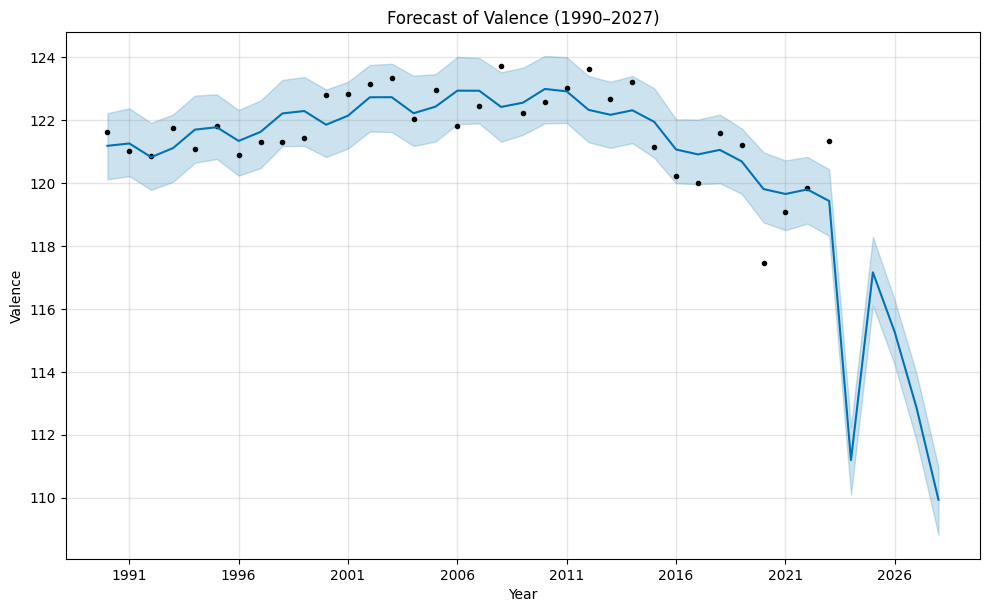

In [ ]:
# Plot forecast
fig = model.plot(forecast)
plt.title("Forecast of Valence (1990–2027)")
plt.xlabel("Year")
plt.ylabel("Valence")
plt.grid(True)
plt.show()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
29,2019-01-01,120.682690,119.652700,121.732482
30,2020-01-01,119.804961,118.746701,120.970347
31,2021-01-01,119.648435,118.496217,120.714334
32,2022-01-01,119.792004,118.703772,120.825135
33,2023-01-01,119.425452,118.317418,120.434526
34,2023-12-31,111.190820,110.094610,112.246160
35,2024-12-31,117.158607,116.105573,118.286843
36,2025-12-31,115.258744,114.218100,116.274521
37,2026-12-31,112.849623,111.801258,113.929514
38,2027-12-31,109.933582,108.818322,110.956817


## Key Observations


🔻 Downward Trend (Post-2023):
There is a noticeable and accelerating decline in average tempo from 2023 onward.

The tempo is forecasted to drop from ~119.4 BPM in 2023 to ~109.9 BPM by 2027.

📉 Tempo Shift (~10 BPM over 5 years):
A shift of ~10 BPM is significant in music — this may reflect the increasing popularity of slower music (like lo-fi, chill, R&B, trap).

🎯 Confidence Intervals:
The confidence bands (yhat_lower and yhat_upper) are fairly tight, indicating high confidence in this downward trend.

## Musical Interpretation


This tempo slowdown likely reflects:

The growing dominance of relaxed genres like lo-fi, ambient, chill-hop, and slower R&B.

A shift in listener preferences from high-energy, fast-paced tracks to more laid-back, atmospheric soundscapes.

The influence of streaming platforms favoring mood-based playlists (e.g., “Chill Vibes”, “Focus”, “Late Night Drive”).

##  Business & Industry Implications

For music producers, curators, or platforms:

You may want to lean into slower tempos when creating or curating new music.

Artists tapping into current trends might consider exploring genres with lower BPM ranges.

Playlists targeting future audiences may benefit from more ambient or chill-oriented styles.